In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [59]:
seuoul_test_data_2020 = pd.read_csv("./data/seoul_movie_2020.csv", thousands=',', encoding='UTF-8')
busan_test_data_2020 = pd.read_csv("./data/busan_movie_2020.csv", thousands=',', encoding='UTF-8')
avg_movie = pd.read_csv("./data/2019_평균자료_영화.csv", thousands=',', encoding='UTF-8')

In [60]:
seuoul_test_data_2020.head()
busan_test_data_2020.head()
avg_movie.head()

,시작일,지역,매출액,관객수,기간
0,2020-08-16,서울시,3361656490,368804,2020-08-16~2020-08-22
1,2020-08-23,서울시,2189550260,247399,2020-08-23~2020-08-29
2,2020-08-30,서울시,1842116650,200100,2020-08-30~2020-09-05
3,2020-09-06,서울시,1733144880,188395,2020-09-06~2020-09-12
4,2020-09-13,서울시,1571785690,172993,2020-09-13~2020-09-19


,기간,지역,매출액,관객수,시작일
0,2020-08-16~2020-08-22,부산시,1114537230,123943,2020-08-16
1,2020-08-23~2020-08-29,부산시,618924290,71890,2020-08-23
2,2020-08-30~2020-09-05,부산시,467448880,53630,2020-08-30
3,2020-09-06~2020-09-12,부산시,401747560,45878,2020-09-06
4,2020-09-13~2020-09-19,부산시,350543860,40374,2020-09-13


,Unnamed: 0,상영편수,매출액,관객수
0,서울,62.076923,9.735130e+09,1.111436e+06
1,부산,27.519231,2.929068e+09,3.491882e+05


In [91]:
seuoul_test_data_2021_bv = pd.read_csv("./data/2021_~02서울.csv", thousands=',', encoding='UTF-8')
seuoul_test_data_2021_av = pd.read_csv("./data/2021_03~06서울.csv", thousands=',', encoding='UTF-8')
busan_test_data_2021_bv = pd.read_csv("./data/2021_~02부산.csv", thousands=',', encoding='UTF-8')
busan_test_data_2021_av = pd.read_csv("./data/2021_03~06부산.csv", thousands=',', encoding='UTF-8')

In [92]:
seuoul_test_data_2021_bv.head()
seuoul_test_data_2021_av.head()

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,625176800,71052,2021-01-01
1,5,서울시,625176800,71052,2021-01-01
2,5,서울시,446257140,50249,2021-01-08
3,5,서울시,761371720,85940,2021-01-15
4,5,서울시,2050589220,230553,2021-01-22


,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,2370034110,245237,2021-03-11
1,5,서울시,2089378170,221908,2021-03-18
2,5,서울시,2156717370,223590,2021-03-25
3,5,서울시,2394668990,261118,2021-04-01
4,5,서울시,1826626560,193633,2021-04-08


In [93]:
movie_seoul_2021 = seuoul_test_data_2021_bv.sort_values(by=['주', '매출액'])

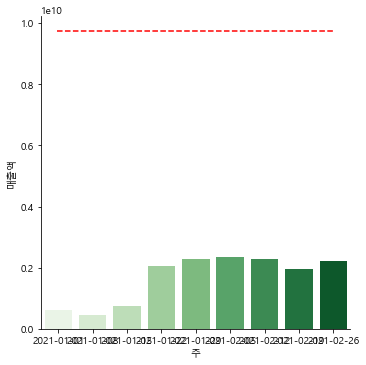

In [94]:
sns.catplot(data = movie_seoul_2021, x='주', y='매출액', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

In [96]:
movie_seoul_2021 = seuoul_test_data_2021_av.sort_values(by=['주', '매출액'])

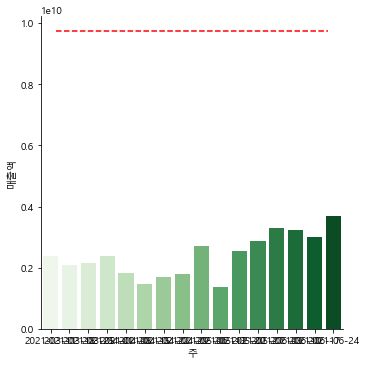

In [97]:
sns.catplot(data = movie_seoul_2021, x='주', y='매출액', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

In [61]:
movie_seoul_2020 = seuoul_test_data_2020.sort_values(by=['기간', '매출액'])

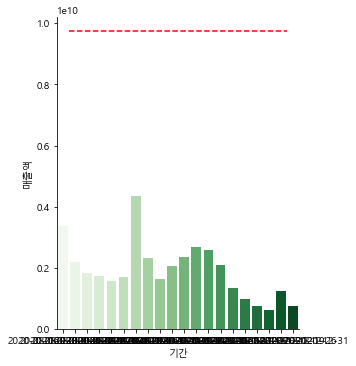

In [74]:
sns.catplot(data = movie_seoul_2020, x='기간', y='매출액', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

In [71]:
customer_seoul_2020 = seuoul_test_data_2020.sort_values(by=['기간', '관객수'])

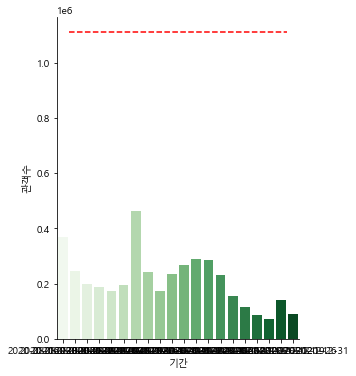

In [72]:
sns.catplot(data = customer_seoul_2020, x='기간', y='관객수', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['관객수'][0],0.05, 0.95, color = 'red', linestyle = '--' )